In [113]:
import cv2
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.feature import hog # The Histogram of Oriented Gradient (HOG)

%matplotlib inline



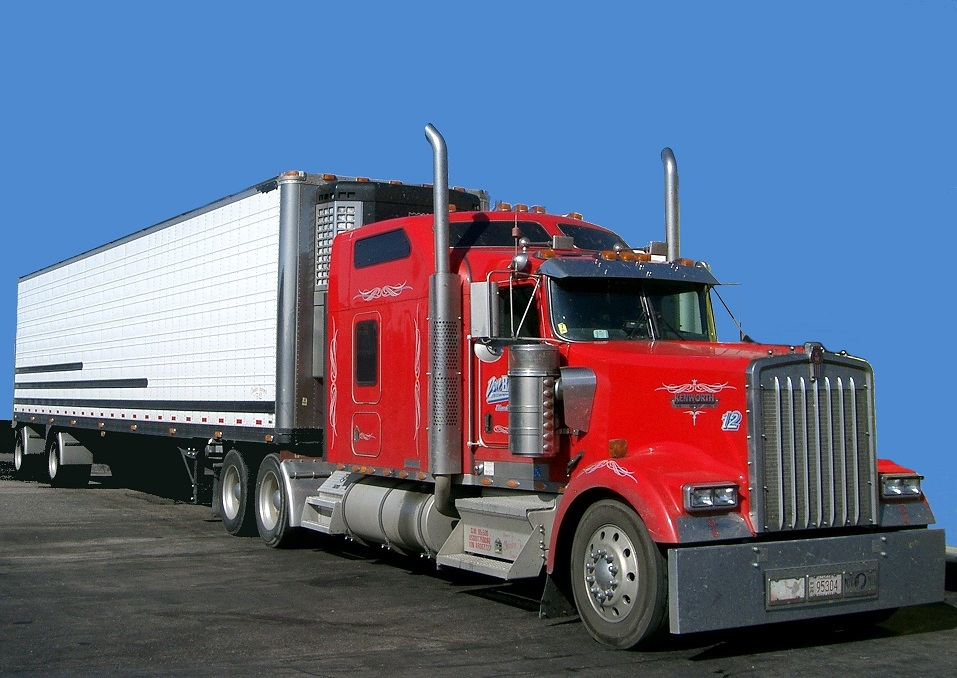

In [104]:
# Load the image
image_color = cv2.imread('truck_free_s.jpg')

# Check if the image was loaded successfully
if image_color is None:
    print("Error: Image not found or failed to load.")
else:
    # Display the image using cv2_imshow
    cv2_imshow(image_color)

# No need for cv2.waitKey() and cv2.destroyAllWindows() in Colab

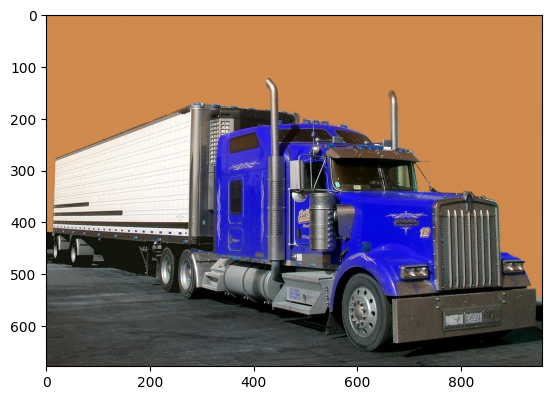

In [105]:
plt.imshow(image_color)

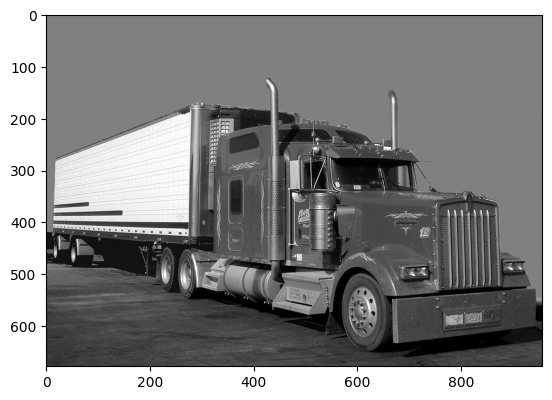

In [106]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')


In [107]:
image_gray.shape

(678, 957)

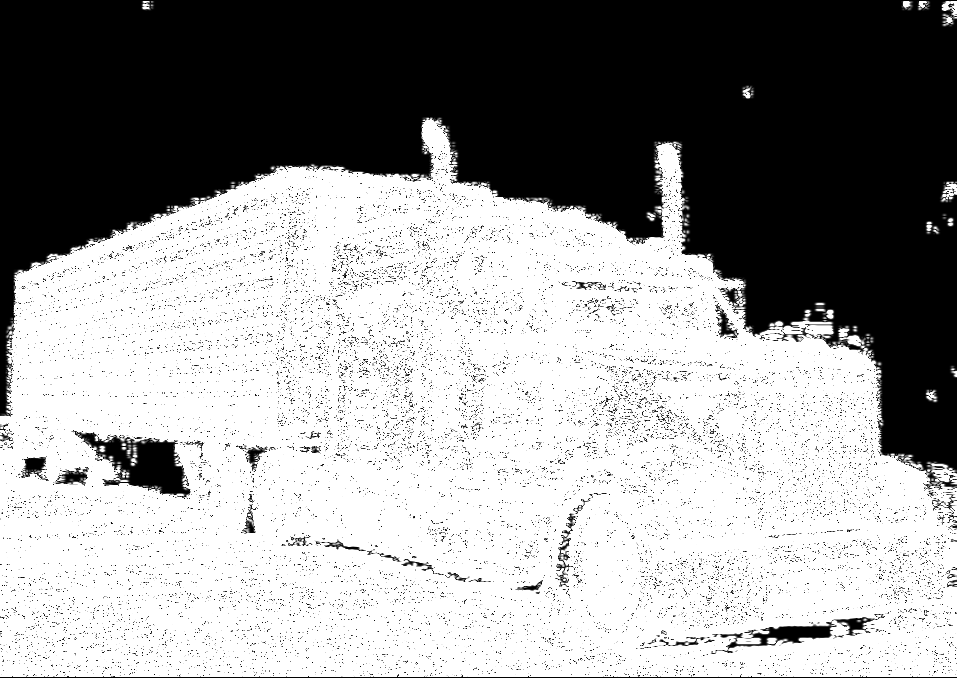

In [108]:
# Sobel Calculations
x_sobel = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=7)

# Normalize the Sobel result to convert it to a displayable format
x_sobel_abs = cv2.convertScaleAbs(x_sobel)

# Display the Sobel - X direction result
cv2_imshow(x_sobel_abs)

# No need for cv2.waitKey() and cv2.destroyAllWindows() in Colab


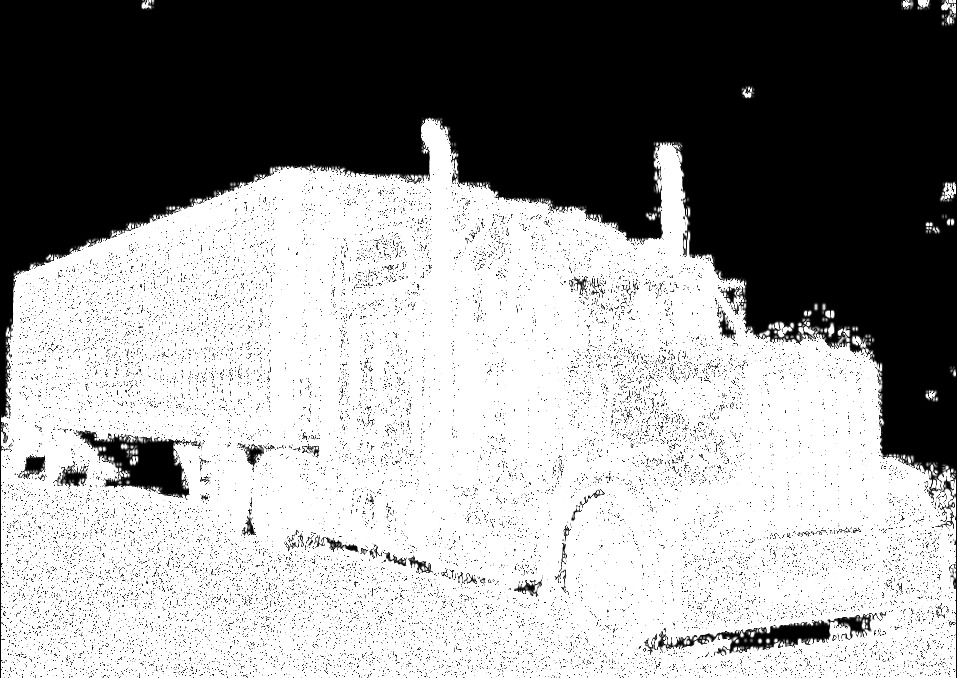

In [109]:
# Sobel Calculations for Y direction
y_sobel = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=7)

# Convert the Sobel result to an 8-bit absolute value image for better display
y_sobel_abs = cv2.convertScaleAbs(y_sobel)

# Display the Sobel - Y direction result
cv2_imshow(y_sobel_abs)

# No need for cv2.waitKey() and cv2.destroyAllWindows() in Colab

Features shape: (42, 59, 1, 1, 9)


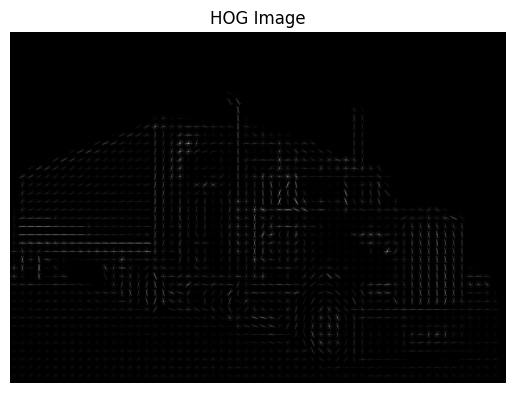

In [114]:
# Calculate HOG features and HOG image
features, hog_image = hog(image_gray,
                          orientations=9,
                          pixels_per_cell=(16, 16),
                          cells_per_block=(1, 1),
                          transform_sqrt=False,
                          visualize=True,
                          feature_vector=False)

# Print the shape of the features
print(f'Features shape: {features.shape}')

# Display the HOG image
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Image')
plt.axis('off')  # Hide axis
plt.show()

In [115]:
features[30,50,:]

array([[[0.62049729, 0.25487372, 0.07395602, 0.16299491, 0.15378672,
         0.18936363, 0.13930874, 0.2324928 , 0.62049729]]])

In [116]:
# Return image after stretching or shrinking its intensity levels.
from skimage import exposure

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 2))

Text(0.5, 1.0, 'HOG Features')

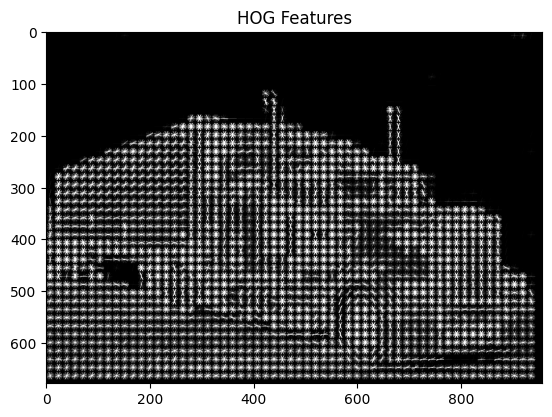

In [117]:
plt.figure()
plt.imshow(hog_image_rescaled, cmap = 'gray')
plt.title('HOG Features')
